In [4]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches 

##### Basic Probability Concepts
The Outcome is the result of a statistical experiment. The Sample Space (
Omega) is the set of all possible outcomes. An Event is a subset of the sample space.



In [5]:
#Define sample space for tossing a coin twice
omega = {'HH', 'HT', 'TH', 'TT'}
print("Ω =" ,omega)

#Define and event: getting heads on the first toss
A = {'HH', 'HT'}
print(f"Event A (Heads on first toss) =", A)
#Check if Event A is a subset of the sample space Ω
is_A_subset_of_omega = A.issubset(omega)
print(f"Is A a subset of Ω?: ", is_A_subset_of_omega)


Ω = {'TH', 'HH', 'HT', 'TT'}
Event A (Heads on first toss) = {'HH', 'HT'}
Is A a subset of Ω?:  True


#### Visualizing Event Relationships with Venn Diagrams
- Venn Diagram (Venndiagram): A visual tool to illustrate relationships between events.
- Intersection (A∩B): The set of outcomes that are in both event A and event B.
- Union (A∪B): The set of outcomes that are in at least one of event A or B.
- Complement ($A^*$): The set of all outcomes that are not in event A.

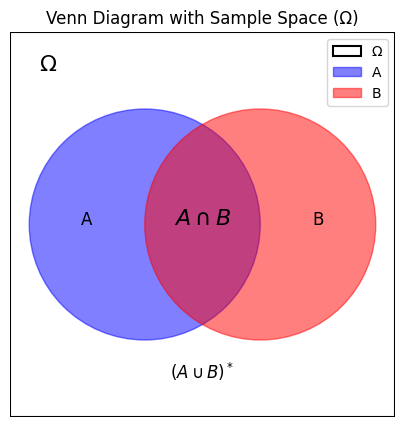

In [6]:
#Create a figure and axes to display the sample space and events
fig, ax = plt.subplots(figsize=(5,5))

#define the coordinates and size for the sample space rectangle 
rect = patches.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', linewidth=1.5, label='Ω')
ax.add_patch(rect)

#Defien the coordinates for the center of the circles for events A and B
circle1_center = (0.35, 0.5)
circle2_center = (0.65, 0.5)
radius = 0.3

#draw the circles 
circle1_center = patches.Circle(circle1_center, radius, facecolor='blue', edgecolor='blue', alpha=0.5, label='A')
circle2_center = patches.Circle(circle2_center, radius, facecolor='red', edgecolor='red', alpha=0.5, label='B')

ax.add_patch(circle1_center)
ax.add_patch(circle2_center)

#set plot limits and labels
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Venn Diagram with Sample Space (Ω)')

#add text labels for events A and B
ax.text(0.2,0.5, "A", fontsize = 12, ha= 'center')
ax.text(0.8,0.5, "B", fontsize = 12, ha= 'center')

ax.text(0.5, 0.5, '$A \\cap B$', fontsize=16, ha='center')
ax.text(0.1, 0.9, '$\Omega$', fontsize=16, ha='center')

# Add a label for the complement outside the circles
ax.text(0.5, 0.1, '$(A \\cup B)^*$', fontsize=12, ha='center')

#remove the axes
ax.axis('off')
# Add a legend
ax.legend(loc='upper right')
plt.savefig('venn_diagram.png')
plt.show()

#### Probability Basics 

###### **Classical Probability** (equally likely outcomes):
###### $$ P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}} $$


###### **Addition Rule (general):**
###### $$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $$

###### **Conditional Probability (Begingad Sannolikhet):**
###### $$ P(B \mid A) = \frac{P(A \cap B)}{P(A)} \quad (P(A)>0) $$

###### **Law of Total Probability**- total probability of an event B by considering all mutually exclusive scenarios $(A_i)$:
###### $$ P(B) = \sum_i P(A_i)\,P(B \mid A_i) $$

###### **Bayes' Theorem:**
###### $$ P(A_j \mid B) = \frac{P(A_j)\,P(B \mid A_j)}{\sum_i P(A_i)\,P(B \mid A_i)} $$


##### Combinatorics (Kombinatorik)

###### **Permutations**  — ways to *arrange*  m items chosen from  n items **(order matters)**:  
###### $$ P(n, m) = \frac{n!}{(n - m)!} $$

###### **Combinations**  — ways to *choose*  m  items from  n  **(order does not matter)**:  
###### $$ \binom{n}{m} = \frac{n!}{m!(n - m)!}  $$

###### The binomial probability of getting k successes in n independent trials with success probability p:
###### $$ p^k(1-p)^{n-k} $$


In [7]:
def calculate_combinatorics(n, m):
    """Calculate and display permutations and combinations.
    
    Args:
        n: Total number of items
        m: Number of items to choose/arrange
    """
    try:
        # Validate inputs
        if n < m or n < 0 or m < 0:
            raise ValueError("n must be ≥ m and both must be non-negative")
            
        #Calculate permutations and combinations
        permutations = math.perm(n, m)
        combinations = math.comb(n, m)
        
        #Print results
        print(f"Permutationer (P({n}, {m})) = {permutations:,}")
        print(f"Kombinationer (C({n}, {m})) = {combinations:,}")
        
    except (ValueError, TypeError) as e:
        print(f"Error: {e}")

# Example 
calculate_combinatorics(5, 3)  # valid case
calculate_combinatorics(3, 5)  # invalid case because n < m

Permutationer (P(5, 3)) = 60
Kombinationer (C(5, 3)) = 10
Error: n must be ≥ m and both must be non-negative


##### Simulation of rolling a dice for pdf and cdf of a discrete random variable


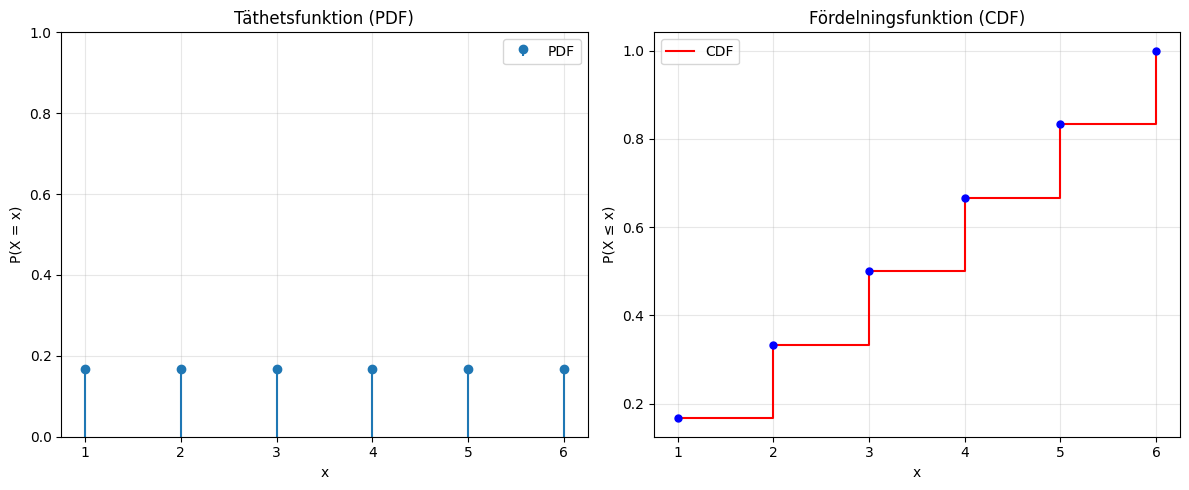


Probability values:
x=1: PDF=0.167, CDF=0.167
x=2: PDF=0.167, CDF=0.333
x=3: PDF=0.167, CDF=0.500
x=4: PDF=0.167, CDF=0.667
x=5: PDF=0.167, CDF=0.833
x=6: PDF=0.167, CDF=1.000


In [10]:
# Create sample space for a die (1-6)
x = np.arange(1, 7)

# draw dependently from the set (1,2,3,4,5,6) with equal probability (probability for each outcome is 1/6)
pdf = np.ones_like(x) / 6.0

# Calculate CDF (cumulative sum of probabilities)
cdf = np.cumsum(pdf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
ax1.stem(x, pdf, basefmt=' ', label='PDF')
ax1.set_title('Täthetsfunktion (PDF)')
ax1.set_xlabel('x')
ax1.set_ylabel('P(X = x)')
ax1.set_ylim(0, 1)  # Set y-axis limit from 0 to 1
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot CDF
ax2.step(x, cdf, 'r-', where='post', label='CDF')
ax2.plot(x, cdf, 'b.', markersize=10)
ax2.set_title('Fördelningsfunktion (CDF)')
ax2.set_xlabel('x')
ax2.set_ylabel('P(X ≤ x)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig("probability_distribution.png")
plt.show()


# Print probability values
print("\nProbability values:")
for i, (p, c) in enumerate(zip(pdf, cdf), 1):
    print(f"x={i}: PDF={p:.3f}, CDF={c:.3f}")